In [1]:
import pygmt 
import pandas as pd
import os,glob
import matplotlib.pyplot as plt
import pickle
from obspy.geodetics.base import gps2dist_azimuth

In [18]:
PATH = '/Volumes/home/Research/STEP/02_Station_result_csv/'
Lithnc = '/Volumes/home/Research/GMT/LithoThickness/LithThickness_v2.nc'
Mohonc = '/Volumes/home/Research/DataBase/01_Armenia/04_Moho_fit_fromCM.nc'
PKLpath = '/Volumes/home/Research/STEP/01_Split'
Resultcsv='/Volumes/home/Research/STEP/05_Station_result_statistics/Station_SK(K)S_2010-2020average_v4.csv'
Volcanocsv='/Volumes/home/Research/DataBase/01_Armenia/02_Volcano_list.csv'
dr = pd.read_csv(Resultcsv)
dv = pd.read_csv(Volcanocsv)

In [23]:
def Background():
    figmap = pygmt.Figure()
    regions=[36, 44.5, 36, 42]
    figmap.basemap(region=regions, projection="M15c", frame = ['x1f0.5', 'y1f0.5', 'nSeW'])
    figmap.grdimage('@earth_relief_30s',region =regions, cmap="eleva.cpt",monochrome=True, shading=True, transparency=50)
    figmap.coast(resolution = 'h', shorelines ='0.5/thinnest,black', water='white', borders = '1/0.3p')

    for i in range(len(dv)):
        vlat= dv['lat'].values[i]
        vlon= dv['lon'].values[i]
        name= dv['VolcanoName'].values[i] 
        figmap.plot(x=vlon,y=vlat,style='t0.2c',color='red')
        figmap.text(x=vlon,y=vlat-0.15,text=name[0:4],font='7p')

    for STApath in glob.glob(f'{PKLpath}/*.pkl'):
        STApkl = pickle.load(open(STApath, "rb"))
        values = [value for keys, value in STApkl.items() ][0]
        NET = values['network']; STA = values['station']
        st_lat = values['latitude']; st_lon = values['longitude']
        figmap.plot(x=st_lon,y=st_lat,style='c0.15c',color='black')
    return figmap

In [ ]:
profile = { 'N':[], 'CP':[], 'EP':[] }
profile['N'].append('A')
profile['CP'].append([41.5,42]) ## center point for x1,y1
profile['EP'].append([46.5,39.2]) ## end point for x2,y2

profile['N'].append('B')
profile['CP'].append([41,39.5]) ## center point for x1,y1
profile['EP'].append([45,43]) ## end point for x2,y2

profile['N'].append('C')
profile['CP'].append([40,40]) ## center point for x1,y1
profile['EP'].append([47,40]) ## end point for x2,y2

profile['N'].append('D')
profile['CP'].append([42,38.5]) ## center point for x1,y1
profile['EP'].append([46.5,42]) ## end point for x2,y2

In [ ]:
figmap= Background(region=[40, 50, 37, 44])
plt.rc('font',family='Times New Roman')
fig, ax = plt.subplots(4,1,figsize=(10,7))

for i in range(len(profile['CP'])):
    centerpoint = profile['CP'][i]
    endpoint = profile['EP'][i]
    number = profile['N'][i]
    points = pygmt.project(center=centerpoint, endpoint=endpoint, generate=0.1,unit=True)
    figmap.plot(x=points.r, y=points.s, pen="1p,black")
    figmap.text(x=centerpoint[0],y=centerpoint[1],text=number, font='20p,black', justify='LT')
    Lithfile = pygmt.grdtrack(points=points,grid=Lithnc,newcolname="Thickness")
    Mohofile = pygmt.grdtrack(points=points,grid=Mohonc,newcolname="Thickness")
    
    plot(i, number, Mohofile, Lithfile)

figmap.show()
fig.show()

In [4]:
def plot(i,num ,Mohofile, Lithfile):
#     maxdist = max(Mohofile['p'])
    ax[i].plot(Mohofile['p'],-1*Mohofile['Thickness'],c='orange',lw=2,label='Crust',alpha=0.5)
    ax[i].plot(Lithfile['p'],-1*Lithfile['Thickness'],c='brown',lw=3,label='Lithosphere')
    ax[i].set_xlim(0,590)
    ax[i].set_ylim(-100,0)
    # plt.xticks([])
    ax[i].set_ylabel(num, fontsize=15)
    if i ==3:
        ax[i].set_xlabel('Distance (km)', fontsize=15)
#     ax[i].set_xticks(fontsize=13)
#     ax[i].set_yticks(fontsize=13)
#     ax[i].set_grid()
# plt.legend(fontsize=16,loc=3)
# plt.text(x=180,y=-150,s='Asthenosphere',color='r',fontsize=13,ha='center')
# plt.text(x=180,y=-30,s='Crust',color='brown',fontsize=12,ha='center')
    
# plt.savefig('/Volumes/home/06_NTU_thesis/03_figure/Litho_thickness.png',dpi=200)
# plt.savefig('/Volumes/home/06_NTU_thesis/03_figure/Litho_thickness.pdf')

coast [WARNING]: Length <unit> t not supported - revert to default unit [point]
coast [WARNING]: 0.5/thinnes not a valid number and may not be decoded properly.
grdtrack [WARNING]: Some input points were outside the grid domain(s).


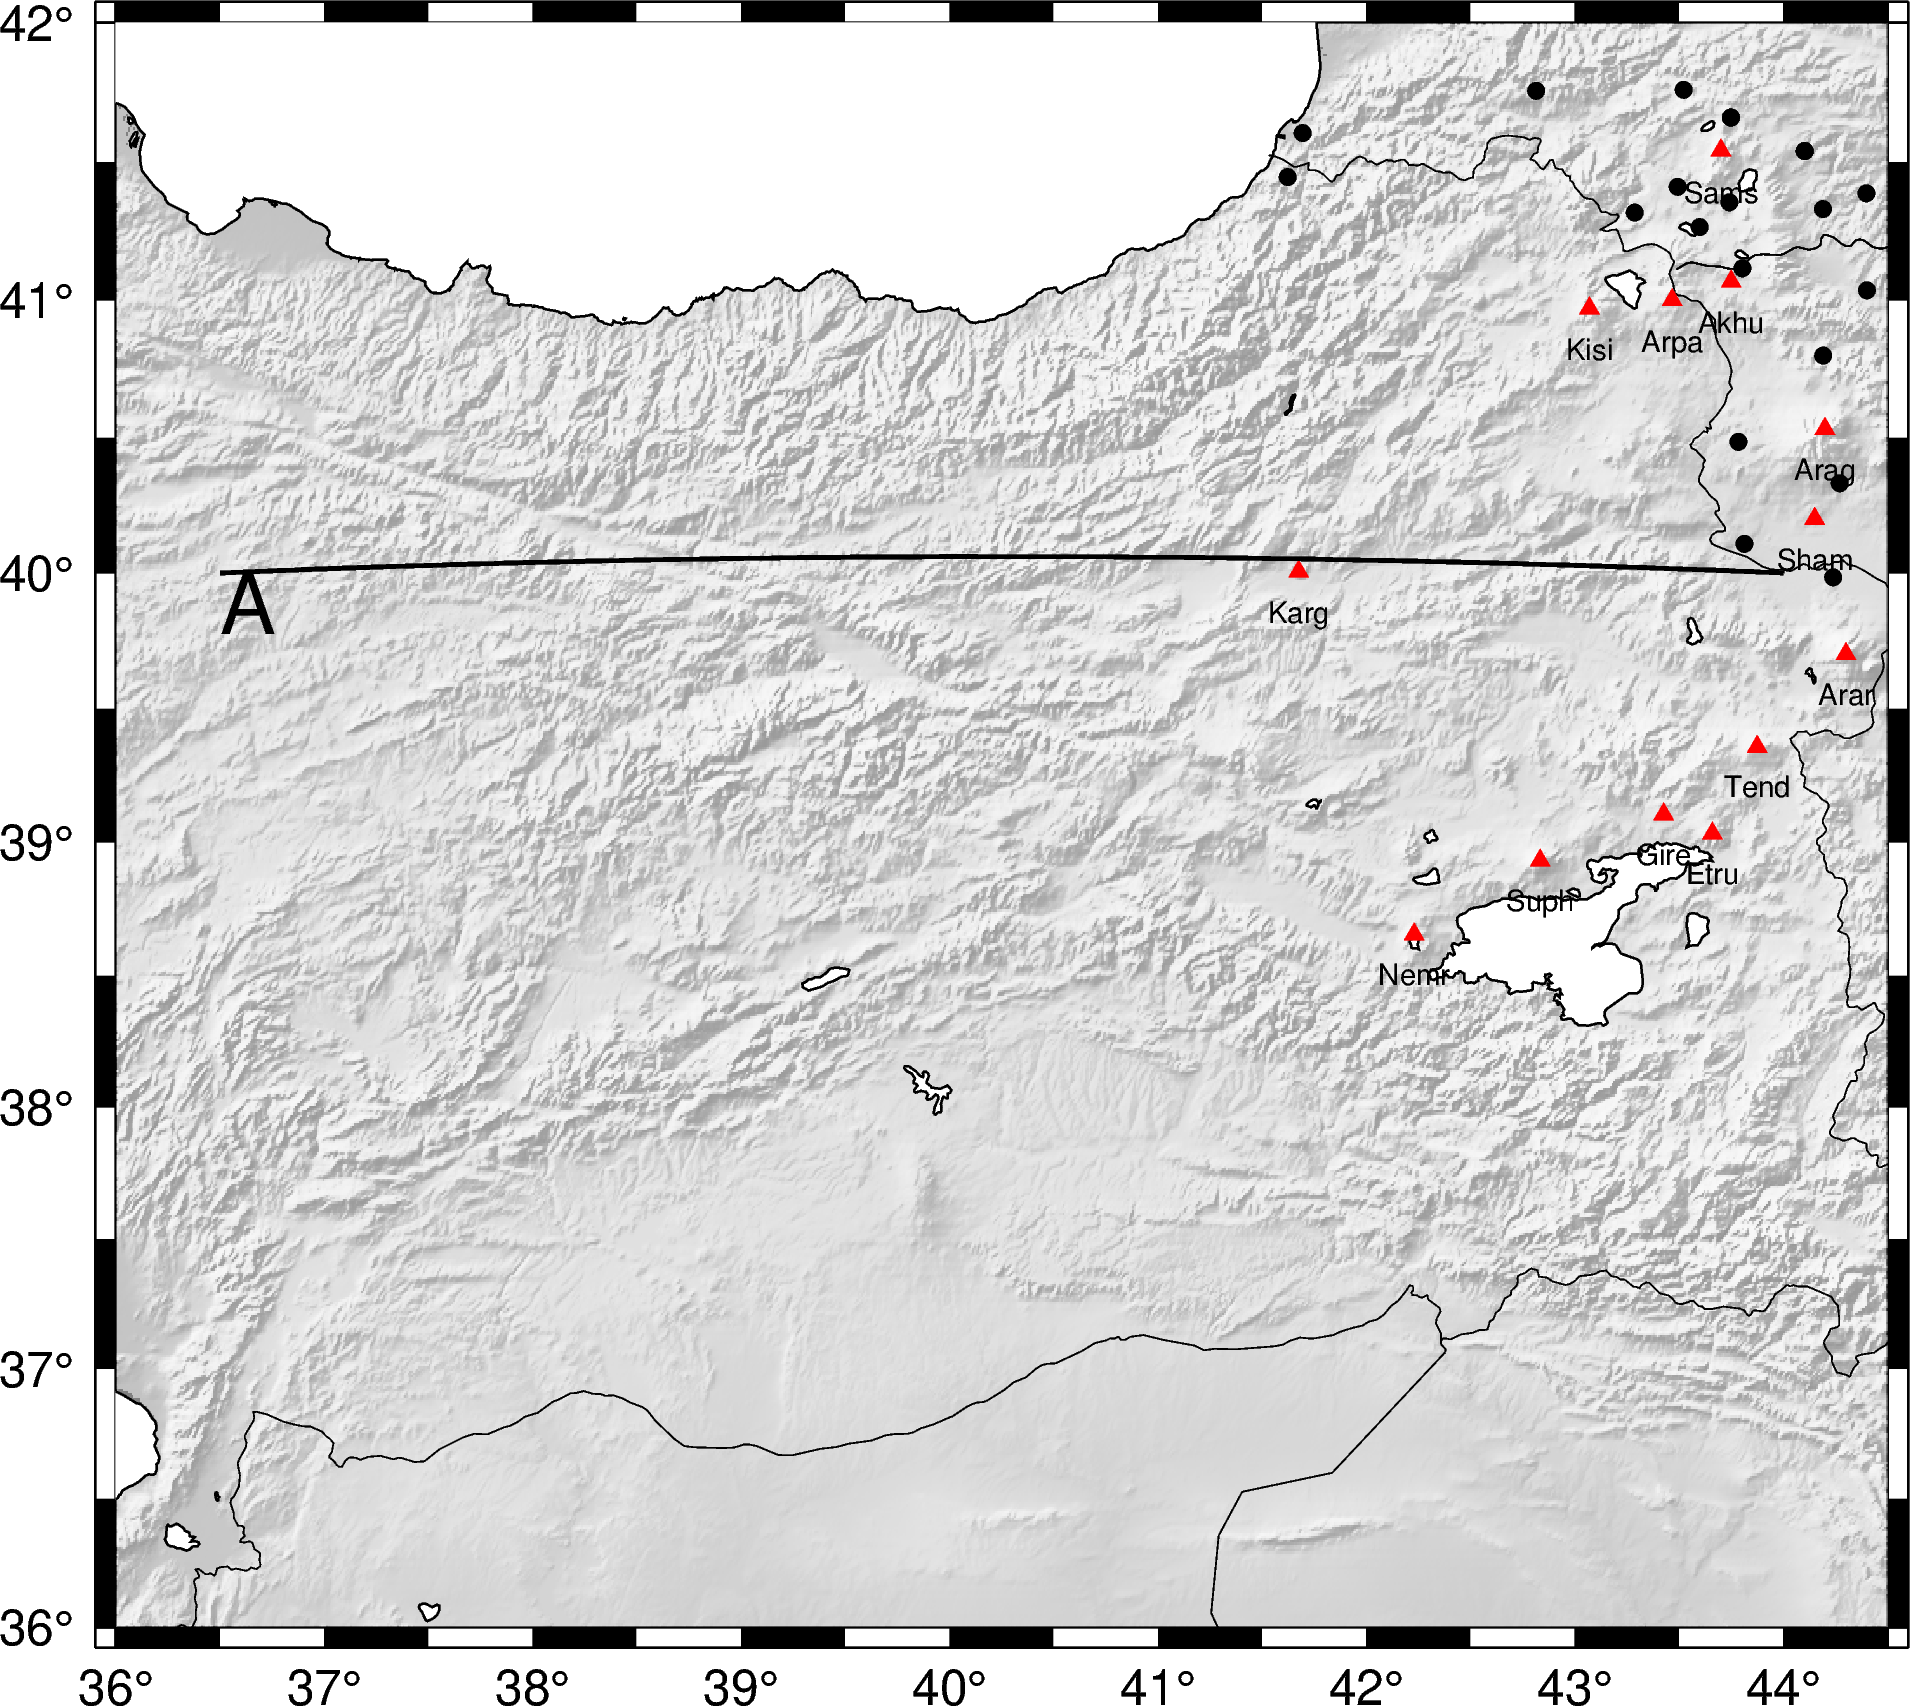

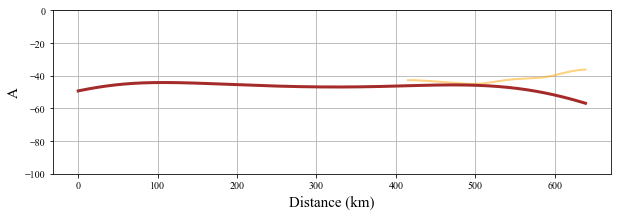

In [24]:
figmap= Background()
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(10,3))
# fig, ax = plt.subplots(4,1,figsize=(10,7))

profile = { 'N':[], 'CP':[], 'EP':[] }
profile['N'].append('A')
profile['CP'].append([36.5,40]) ## center point for x1,y1
profile['EP'].append([44,40]) ## end point for x2,y2

for i in range(len(profile['CP'])):
    centerpoint = profile['CP'][i]
    endpoint = profile['EP'][i]
    number = profile['N'][i]
    points = pygmt.project(center=centerpoint, endpoint=endpoint, generate=0.05,unit=True)
    figmap.plot(x=points.r, y=points.s, pen="1p,black")
    figmap.text(x=centerpoint[0],y=centerpoint[1],text=number, font='20p,black', justify='LT')
    
    Lithfile = pygmt.grdtrack(points=points,grid=Lithnc,newcolname="Thickness")
    Mohofile = pygmt.grdtrack(points=points,grid=Mohonc,newcolname="Thickness")
    
    plt.plot(Mohofile['p'],-1*Mohofile['Thickness'],c='orange',lw=2,label='Crust',alpha=0.5)
    plt.plot(Lithfile['p'],-1*Lithfile['Thickness'],c='brown',lw=3,label='Lithosphere')
#     plt.xlim(0,590)
    plt.ylim(-100,0)
    plt.ylabel(number, fontsize=15)
    plt.xlabel('Distance (km)', fontsize=15)
    plt.grid()
    
figmap.show()
plt.show()